# Found some negative CPRs in BBG data

What do they look like if I try to infer from the GNM data?

In [1]:
import os
os.chdir("/home/charles/src/LondonMirror/Prepayments/")

import prepayments as pp
import numpy as np
import pandas as pd
import ggplot as gg
from datetime import datetime

pm = pp.models.PoolModel()

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
pool_number = 432020
cusip = '36207G4D8'

In [2]:
def scheduled_payment(face_value, interest_rate, loan_age):
    rate = interest_rate / 120000.
    compound_rate = (1 + rate) ** loan_age
    monthly_payment = (face_value * rate * compound_rate) / (compound_rate - 1)
    interest_payment = face_value * rate
    return monthly_payment - interest_payment

In [7]:
p_data = pm.data_pool.df_for_pool_number(pool_number)
p_data

,aols,as_of_date,cusip,few_units_number_of_loans,few_units_pct_of_upb,few_units_upb,first_quartile_aols_q1,first_quartile_cltv_q1,first_quartile_ltv_q1,first_quartile_wac_q1,...,third_quartile_waolt_q3,third_quartile_warm_q3,wac,wagm,wala,waolt,warm,weighted_average_original_cltv,weighted_average_original_loan_size,weighted_average_original_ltv
2012-02-01,6994650,2012-02-01,36207G4D8,999999,99999,9999999999999,6339300,999,95,99999,...,360,54,8500,99999,186,295,47,999,0,95
2012-03-01,6994650,2012-03-01,36207G4D8,999999,99999,9999999999999,6339300,999,95,99999,...,360,53,8500,99999,187,293,46,999,0,95
2012-04-01,6994650,2012-04-01,36207G4D8,999999,99999,9999999999999,6339300,999,95,99999,...,360,52,8500,99999,188,293,45,999,0,98
2012-05-01,6994650,2012-05-01,36207G4D8,999999,99999,9999999999999,6339300,999,95,99999,...,360,51,8500,99999,189,293,44,999,0,98
2012-06-01,6994650,2012-06-01,36207G4D8,999999,99999,9999999999999,6339300,999,95,99999,...,360,50,8500,99999,190,292,43,999,0,98
2012-07-01,6994650,2012-07-01,36207G4D8,999999,99999,9999999999999,6339300,999,95,99999,...,360,49,8500,99999,191,292,42,999,6907966,98
2012-08-01,6994650,2012-08-01,36207G4D8,999999,99999,9999999999999,6339300,999,95,99999,...,360,48,8500,99999,192,291,41,999,0,98
2012-09-01,6994650,2012-09-01,36207G4D8,999999,99999,9999999999999,6339300,999,95,99999,...,360,47,8500,99999,193,291,40,999,6891925,98
2012-10-01,6994650,2012-10-01,36207G4D8,999999,99999,9999999999999,6339300,999,95,99999,...,360,46,8500,99999,194,290,39,999,6887593,98
2012-11-01,6994650,2012-11-01,36207G4D8,999999,99999,9999999999999,6339300,999,95,99999,...,360,45,8500,99999,195,290,38,999,6883012,98


In [14]:
p_data.index = pd.DatetimeIndex(p_data.index)

In [11]:
bbg = pp.Bloomberg()

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


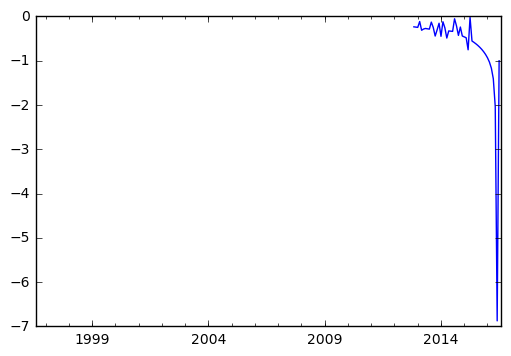

In [20]:
cpr_bbg = bbg.get_cpr(p_data.cusip[0]).div(100)

sp = pd.Series({dt:scheduled_payment(v['original_aggregate_amount'], v['security_interest_rate'], v['wala']+30) 
               for dt,v in p_data.iterrows()})
smm = (0-p_data['pool_upb'].ix['2012-09-01':].diff()).sub(sp).div(p_data['pool_upb'].ix['2012-09-01':])
cpr = (1 - (1 - smm.shift(1)).pow(12))
cpr.index = pd.DatetimeIndex(cpr.index)
cpr_bbg.sub(cpr).plot()

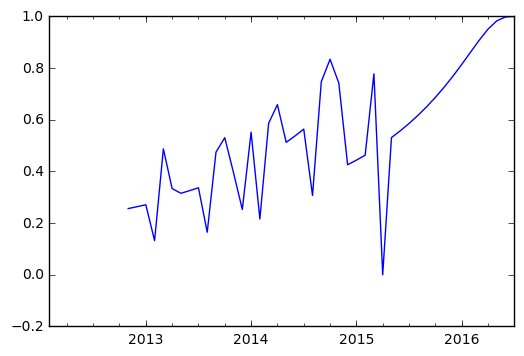

In [21]:
cpr.plot()

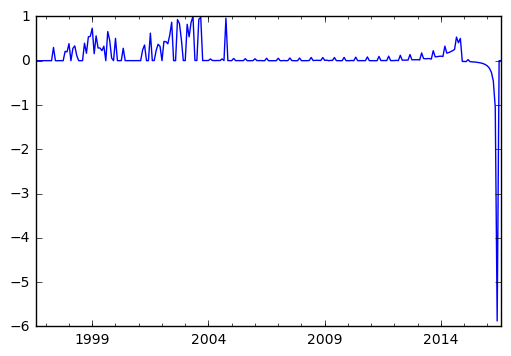

In [22]:
cpr_bbg.plot()

Non-negative. I'm going to take these out, I think.